In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mpl


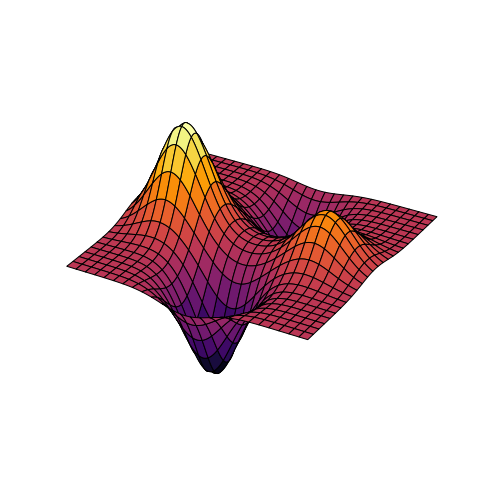

In [2]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')


def cool_3d_plot(X,Y,Z,ax):
    ax.plot_surface(X, Y, Z, edgecolor='black', cmap='inferno', rstride=8, cstride=8,alpha=1)
#     ax.set(xlim=(-1.5,1.5), ylim=(-1.5,1.5), zlim=(-.01,np.amax(Z)),
#        xlabel='y', ylabel='yhat')


    
xlin = np.linspace(-5, 5, 200)
ylin = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(xlin, ylin)
pos = np.dstack((X, Y))

f = lambda vec: multivariate_normal.pdf(vec, mean=np.array([-3, 0]), cov=np.eye(2)) +\
                0.5*multivariate_normal.pdf(vec, mean=np.array([3, 0]), cov=np.eye(2)) +\
                -1*multivariate_normal.pdf(vec, mean=np.array([0,-3]), cov=np.eye(2)) +\
                -0.5*multivariate_normal.pdf(vec, mean=np.array([0, 3]), cov=np.eye(2)) 

Z = f(pos)
cool_3d_plot(X, Y,Z,ax)
ax.axis('off')
ax.set(frame_on=False)  # New

plt.tight_layout()
plt.savefig('saddle.png', transparent=True)

(-2.74499036544364, 2.9479156445910086, -3.926731517547586, 3.172279057301225)

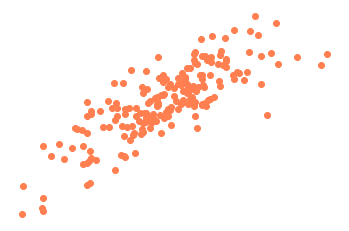

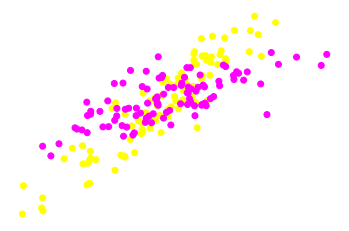

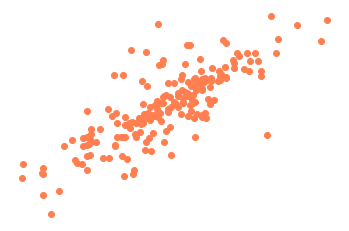

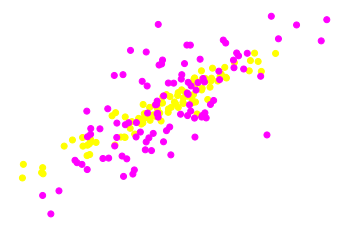

In [3]:
Xs = np.random.normal(size=200)
Ws = 0.5*np.random.normal(size=200)

attr = np.zeros_like(Xs)
attr[:100] = np.ones(100)

# different relationship
thetas = [1.5, 0.5]
Ys = np.zeros_like(Xs)
Ys[:100] = thetas[0] * Xs[:100]
Ys[100:] = thetas[1] * Xs[100:]
Ys += Ws

plt.scatter(Xs, Ys, c='coral')
plt.axis('off')
plt.figure()
plt.axis('off')
plt.scatter(Xs, Ys, c=attr,cmap='spring')

# different noise
theta = 1
Ys = theta * Xs
Ys[:100] += 0.5*Ws[:100]
Ys[100:] += 2*Ws[100:]

plt.figure()
plt.scatter(Xs, Ys,c='coral')
plt.axis('off')
plt.figure()
plt.scatter(Xs, Ys, c=attr, cmap='spring')
plt.axis('off')